In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
customers=pd.read_csv('../datasets/brazil_ecomm/olist_customers_dataset.csv')
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [3]:
geolocation=pd.read_csv('../datasets/brazil_ecomm/olist_geolocation_dataset.csv')
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [4]:
order_items=pd.read_csv('../datasets/brazil_ecomm/olist_order_items_dataset.csv')
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [5]:
orders=pd.read_csv('../datasets/brazil_ecomm/olist_orders_dataset.csv')
orders.head(2)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [6]:
order_payments=pd.read_csv('../datasets/brazil_ecomm/olist_order_payments_dataset.csv')
order_payments.head(2)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
order_reviews=pd.read_csv('../datasets/brazil_ecomm/olist_order_reviews_dataset.csv')
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
order_items=pd.read_csv('../datasets/brazil_ecomm/olist_order_items_dataset.csv')
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [9]:
products=pd.read_csv('../datasets/brazil_ecomm/olist_products_dataset.csv')
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
sellers=pd.read_csv('../datasets/brazil_ecomm/olist_sellers_dataset.csv')
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [11]:
translate=pd.read_csv('../datasets/brazil_ecomm/product_category_name_translation.csv')
translate.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [12]:
translate=pd.read_csv('../datasets/brazil_ecomm/product_category_name_translation.csv')
translate.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [13]:
order_payments=pd.read_csv('../datasets/brazil_ecomm/olist_order_payments_dataset.csv')
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [14]:
df_big=orders.merge(order_payments,on='order_id',how='inner').merge(customers,on='customer_id',how='inner').merge(order_items,on='order_id',how='inner',).merge(order_payments,on='order_id',how='inner')
df_big

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_x,payment_type_x,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139412,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,...,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1,credit_card,3,195.00
139413,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,...,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1,credit_card,5,271.01
139414,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,...,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1,credit_card,4,441.16
139415,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,...,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1,credit_card,4,441.16


In [15]:
df_big.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y'],
      dtype='object')

In [16]:
big_df_clean=df_big['order_id customer_unique_id customer_city order_status price order_delivered_customer_date'.split()]
big_df_clean

,order_id,customer_unique_id,customer_city,order_status,price,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,sao paulo,delivered,29.99,2017-10-10 21:25:13
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,sao paulo,delivered,29.99,2017-10-10 21:25:13
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,sao paulo,delivered,29.99,2017-10-10 21:25:13
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,sao paulo,delivered,29.99,2017-10-10 21:25:13
4,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,sao paulo,delivered,29.99,2017-10-10 21:25:13
...,...,...,...,...,...,...
139412,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,praia grande,delivered,174.90,2018-02-28 17:37:56
139413,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,delivered,205.99,2017-09-21 11:24:17
139414,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,japuiba,delivered,179.99,2018-01-25 23:32:54
139415,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,japuiba,delivered,179.99,2018-01-25 23:32:54


In [17]:
big_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139417 entries, 0 to 139416
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       139417 non-null  object 
 1   customer_unique_id             139417 non-null  object 
 2   customer_city                  139417 non-null  object 
 3   order_status                   139417 non-null  object 
 4   price                          139417 non-null  float64
 5   order_delivered_customer_date  135718 non-null  object 
dtypes: float64(1), object(5)
memory usage: 7.4+ MB


In [18]:
big_df_clean['order_delivered_customer_date']=pd.to_datetime(big_df_clean['order_delivered_customer_date'],yearfirst=True)
big_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139417 entries, 0 to 139416
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       139417 non-null  object        
 1   customer_unique_id             139417 non-null  object        
 2   customer_city                  139417 non-null  object        
 3   order_status                   139417 non-null  object        
 4   price                          139417 non-null  float64       
 5   order_delivered_customer_date  135718 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.4+ MB


<ipython-input-18-d11a0540c078>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_clean['order_delivered_customer_date']=pd.to_datetime(big_df_clean['order_delivered_customer_date'],yearfirst=True)


Kita anggap data valid hanya yang DELIVERED dan SHIPPED saja , dan kita akan memperkecil scope untuk customer city hanya di sao paolo , karena sao paolo memiliki data terbanyak

In [19]:
big_df_clean['order_status'].value_counts()

delivered      135719
shipped          2132
canceled          672
processing        485
invoiced          399
unavailable         7
approved            3
Name: order_status, dtype: int64

In [20]:
big_df_clean['customer_city'].value_counts(normalize=True)

sao paulo           0.167870
rio de janeiro      0.072832
belo horizonte      0.025642
brasilia            0.018728
campinas            0.016289
                      ...   
prudencio thomaz    0.000007
felisburgo          0.000007
doce grande         0.000007
dois riachos        0.000007
crucilandia         0.000007
Name: customer_city, Length: 4110, dtype: float64

In [21]:
valid=['delivered','shipped']

In [22]:
big_df_clean_filtered=big_df_clean.loc[(big_df_clean['customer_city']=='sao paulo') & (big_df_clean['order_status'].isin(valid))]

In [23]:
big_df_clean_filtered['order_status'].value_counts()

delivered    22875
shipped        167
Name: order_status, dtype: int64

In [24]:
print(f"ada {big_df_clean_filtered.order_id.nunique()} jumlah unique order dan {big_df_clean_filtered.customer_unique_id.nunique()} jumlah customer di area sao paolo.")

ada 15186 jumlah unique order dan 14662 jumlah customer di area sao paolo.


Dapat dilihat ada 15186 Unique order dalam dataset ini

In [25]:
big_df_clean_filtered.groupby(['order_id','customer_unique_id'])[['customer_city']].count().rename

<bound method DataFrame.rename of                                                                    customer_city
order_id                         customer_unique_id                             
000e63d38ae8c00bbcb5a30573b99628 860fc00d3154ce2346c43ebe47b9b6ce              1
0011d82c4b53e22e84023405fb467e57 02daaa0e021d624d1784c4ea5cc84ace              1
001c85b5f68d2be0cb0797afc9e8ce9a 55a269f324455e78349e7b9b7e7e5911              1
001d8f0e34a38c37f7dba2a37d4eba8b 870a0bdc769f9a7870309036740e79ea              2
0026a368634b6e6f34f33b1499773a30 2ecb0fc377050ca3b001d3a199e951ec              1
...                                                                          ...
ffed7e90414c1477a6b92554661d465f 02fb446e82415f8d22a44a8dd49c1954              1
ffef98cd5ecdc992fefbd967549520dd 2c27e67b4518e5db1b0b1faf8fb920c7              1
ffefb169ddf34cecc0622a6d3cc387f8 d11fd20c68a7d716b6e2df9bccda5b8e              1
fff90cdcb3b2e6cfb397d05d562fd3fe 0e1dad535a5b2359a2ff0a7d475ffb86          

In [26]:
customer=pd.crosstab(index=big_df_clean_filtered['customer_unique_id'],columns='count').reset_index()
customer

col_0,customer_unique_id,count
0,0004bd2a26a76fe21f786e4fbd80607f,1
1,000d460961d6dbfa3ec6c9f5805769e1,1
2,000ed48ceeb6f4bf8ad021a10a3c7b43,1
3,0010fb34b966d44409382af9e8fd5b77,1
4,0014a5a58da615f7b01a4f5e194bf5ea,1
...,...,...
14657,ffca77d46c6d7d815549a5e4482dba2f,1
14658,ffcd4b43c08405501a6bf2c66be83e83,1
14659,ffddff7cfa827d6c430ed9e373be416c,1
14660,ffe0c10afc687bcf34a0451f2b87dd9b,1


In [27]:
customer['count'].unique()

array([   1,    2,    7,    5,    3,    4,    8,    6,  144,   75,   18,
         32,   16,   36,    9,   81,   12,   20,   25,  200,   10,   21,
        676,  169,   13,   49,   11,   74, 1467,  145,  225], dtype=int64)

In [28]:
customer['count'].value_counts()

1       12375
2        1420
4         360
3         275
5          70
9          37
8          30
6          26
16         13
7          10
18          5
12          5
25          5
36          4
11          3
10          3
49          3
13          2
20          2
32          2
169         2
21          1
144         1
200         1
1467        1
676         1
81          1
75          1
225         1
74          1
145         1
Name: count, dtype: int64

In [29]:
customer.describe()

col_0,count
count,14662.000000
mean,1.571545
std,13.917715
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1467.000000


<AxesSubplot:xlabel='count'>

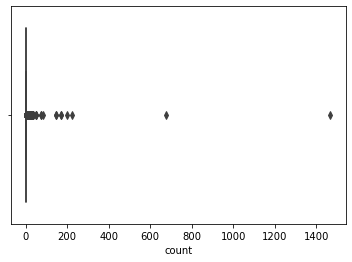

In [30]:
sns.boxplot(data=customer,x='count')

<AxesSubplot:xlabel='count', ylabel='count'>

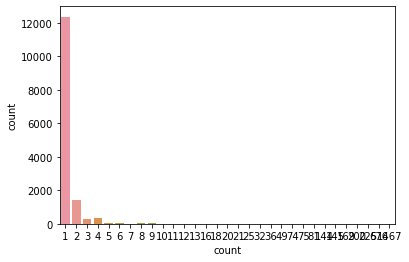

In [31]:
sns.countplot(data=customer,x='count')

Dari penjelasan di dataset , order ID tidak unique karena ada beberapa barang dalam 1 order. untuk harga setiap barang harus dijumlah agar didapatkan nilai moneter dari order tersebut. Kita akan menggabungkan price dengan fungsi ``` aggregate ``` untuk menggabungkan row dalam dataframe. Untuk fungsi aggregate kita akan menggunakan sebagai berikut : 
1. customer_unique_id, customer city, order_status : first (mengambil data pertama)
1. price : sum
1. order_delivered_customer_date : max (untuk mengambil data pembelian terahkir.

In [32]:
big_df_clean_filtered_combined = big_df_clean_filtered.groupby(['order_id',]).aggregate({'customer_unique_id' : 'first', 'customer_city' : 'first', 'order_status' : 'first' ,'price' : 'sum' , 'order_delivered_customer_date' : 'max'}).reset_index()
big_df_clean_filtered_combined

,order_id,customer_unique_id,customer_city,order_status,price,order_delivered_customer_date
0,000e63d38ae8c00bbcb5a30573b99628,860fc00d3154ce2346c43ebe47b9b6ce,sao paulo,delivered,47.90,2018-03-27 14:51:47
1,0011d82c4b53e22e84023405fb467e57,02daaa0e021d624d1784c4ea5cc84ace,sao paulo,delivered,289.00,2018-01-26 22:14:02
2,001c85b5f68d2be0cb0797afc9e8ce9a,55a269f324455e78349e7b9b7e7e5911,sao paulo,delivered,99.00,2017-12-22 18:37:40
3,001d8f0e34a38c37f7dba2a37d4eba8b,870a0bdc769f9a7870309036740e79ea,sao paulo,delivered,37.98,2017-05-26 13:14:50
4,0026a368634b6e6f34f33b1499773a30,2ecb0fc377050ca3b001d3a199e951ec,sao paulo,delivered,149.00,2017-11-07 21:58:51
...,...,...,...,...,...,...
15181,ffed7e90414c1477a6b92554661d465f,02fb446e82415f8d22a44a8dd49c1954,sao paulo,delivered,149.90,2017-08-14 15:52:37
15182,ffef98cd5ecdc992fefbd967549520dd,2c27e67b4518e5db1b0b1faf8fb920c7,sao paulo,delivered,139.90,2017-07-14 16:19:41
15183,ffefb169ddf34cecc0622a6d3cc387f8,d11fd20c68a7d716b6e2df9bccda5b8e,sao paulo,delivered,129.99,2017-07-19 16:36:31
15184,fff90cdcb3b2e6cfb397d05d562fd3fe,0e1dad535a5b2359a2ff0a7d475ffb86,sao paulo,delivered,89.90,2017-11-29 02:24:25


In [33]:
big_df_clean_filtered_combined.describe()

,price
count,15186.000000
mean,164.652643
std,1547.503518
min,2.290000
25%,40.000000
50%,79.900000
75%,143.800000
max,162841.500000


In [34]:
big_df_clean_filtered_combined.describe(include='object')

,order_id,customer_unique_id,customer_city,order_status
count,15186,15186,15186,15186
unique,15186,14662,1,2
top,818ea45f3cef61b3f0f71a0491c1b636,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,delivered
freq,1,16,15186,15045


In [35]:
cek=pd.DataFrame(big_df_clean_filtered_combined.customer_unique_id.value_counts())

Dapat dilihat ada 14662 Unique value. Berarti ada 14662 customer di dalam data ecommerce sao paolo.

dari histogram di atas dapat dilihat bahwa rata2 tiap orang memiliki 1 order.
kita lakukan penambahan dummy variable dan ```groupby.sum()``` DataFrame based on customer_Id supaya bisa didapatkan value frequency pada masing masing customer id

In [37]:
df_rfm=big_df_clean_filtered_combined.groupby(['customer_unique_id']).aggregate({'order_id' : 'first', 'price' : 'sum', 'order_delivered_customer_date' : 'max' ,'frequency' : 'sum'})
df_rfm.reset_index()

SpecificationError: Column(s) ['frequency'] do not exist

In [ ]:
df_rfm.info()

In [ ]:
df_rfm.reset_index()

In [ ]:
df_rfm.frequency.value_counts()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_rfm,x='frequency')
plt.show()

Dari grafik di atas dapat dilihat bahwa pada frequency 1 ada banyak sekali customerid dengan hanya 1 transaksi. mari kita cek , untuk customer dengan 1 transaksi melakukan transaksi pada tanggal apa (Mungkin ada promo khusus untuk pembelian pertama di Ecommerce, sehingga banyak yang memanfaatkan promo tersebut)

In [ ]:
df_rfm_1=df_rfm[df_rfm['frequency']==1]
df_rfm_1.reset_index()

Kita lakukan pengecekan transaksi terbanyak ada pada bulan dan tahun apa dengan membuat kolom baru dengan tahun dan bulan transaksi.

In [ ]:
df_rfm_1.info()

In [ ]:
df_rfm_1['month_year']=df_rfm_1['order_delivered_customer_date'].dt.strftime('%Y-%m')
df_rfm_1.reset_index()

In [ ]:
df_rfm_1.groupby('month_year')['price'].count()

AGar grafik dapat lebih terbaca, kita drop untuk row dengan nilai 1, dan untuk customer dengan frequency 1 nantinya akan diberikan nilai frequency 1 pada matrix RFM.

In [ ]:
df_rfm_no_1=df_rfm[df_rfm['frequency']!=1]
df_rfm_no_1.reset_index()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_rfm_no_1,x='frequency')
plt.show()

Karena hanya ada unique value dengan jumlah transaksi 2,3,4,5,16 untuk customer sao paolo. Maka akan dilakukan penilaian sebagai berikut : 

1. customer dengan frequency pembelian <=2 akan diberikan label frequency 1 
1. customer dengan frequency pembelian 3 akan diberikan label frequency 2
1. customer dengan frequency pembelian 4 akan diberikan label frequency 3
1. customer dengan frequency pembelian <4 akan diberikan label frequency 4

In [ ]:
big_df_clean_filtered_combined['frequency']=1
big_df_clean_filtered_combined

In [ ]:
df_rfm=big_df_clean_filtered_combined.groupby(['customer_unique_id']).aggregate({'order_id' : 'first', 'price' : 'sum', 'order_delivered_customer_date' : 'max' ,'frequency' : 'sum'})
df_rfm

In [ ]:
df_rfm.isnull().sum()

In [ ]:
df_rfm[df_rfm['order_delivered_customer_date'].isnull()]

Untuk missing value ordered deliver akan di drop, karena tidak bisa ditentukan date deliverednya ,jadi kita anggap data ini tidak valid.

In [ ]:
df_rfm.dropna(inplace=True)
df_rfm.isna().sum()

In [ ]:
df_rfm.reset_index()

dari df_rfm kita memiliki data price **(monetary)** , order_delivered_customer_date **(Recency)** dan **Frequency**.
Kita akan menggunakan **Tanggal terahkir + 1 hari** sebagai setpoint awal untuk recency.

In [ ]:
df_rfm.describe(include='datetime')

In [ ]:
setpoint=pd.to_datetime(df_rfm.describe(include='datetime').loc['last'], yearfirst=True)+ datetime.timedelta(days=1)
setpoint.date

Kita lakukan penambahan feature ```day_since_last_purchase``` dengan mengurangi ```setpoint``` dengan ```order_delivered_customer_date``` 

In [ ]:
df_rfm['order_delivered_customer_date']=df_rfm['order_delivered_customer_date'].dt.date
df_rfm

In [ ]:
df_rfm.reset_index()

In [ ]:
df_rfm.info()

In [ ]:
df_rfm['order_delivered_customer_date']=pd.to_datetime(df_rfm['order_delivered_customer_date'])
df_rfm.info()

In [ ]:
df_rfm['day_since_last_purchase']= df_rfm['order_delivered_customer_date'].apply(lambda x : x-setpoint)
df_rfm

In [ ]:
df_rfm.info()

In [ ]:
df_rfm['day_since_last_purchase']=df_rfm['day_since_last_purchase'].astype('timedelta64[D]')
df_rfm

In [ ]:
df_rfm.reset_index()

># Segmentation RFM

In [ ]:
rfm_end=df_rfm.drop(['order_id','order_delivered_customer_date'],axis=1).reset_index()
rfm_end

>### Price Column

In [ ]:
rfm_end.describe()

In [ ]:
sns.boxplot(data=rfm_end['price'])

Plot tidak dapat terbaca karena outlier yang nilainya terlalu jauh.

In [ ]:
sns.displot(data=rfm_end,x='price')

In [ ]:
price_check=rfm_end.query('price < 200')['price']
sns.histplot(data=price_check)

In [ ]:
rfm_end[['price','frequency','day_since_last_purchase']].describe().loc[['mean','min','25%','50%','75%','max']]

Untuk Scoring Frequency tidak menggunakan data Quartil , karena jumlah frequency 1 terlalu banyak, sehingga nilai semua quartil menjadi 1. 

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_rfm_no_1,x='frequency')
plt.show()

Karena hanya ada unique value dengan jumlah transaksi 2,3,4,5,16 untuk customer sao paolo. Maka akan dilakukan penilaian sebagai berikut : 

1. customer dengan frequency pembelian <=2 akan diberikan label frequency 1 
1. customer dengan frequency pembelian 3 akan diberikan label frequency 2
1. customer dengan frequency pembelian 4 akan diberikan label frequency 3
1. customer dengan frequency pembelian <4 akan diberikan label frequency 4

>### Defining RFM Metrics

In [ ]:
def rfm_price(x):
    lower_quartil=42.90
    median=79.99
    upper_quartil=149.81
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val

def rfm_freq(x):
    lower_quartil=2
    median=3
    upper_quartil=4
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val
def rfm_recency(x):
    lower_quartil=-336.0
    median=-209.0
    upper_quartil=-112.0
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val

In [ ]:
rfm_class=pd.DataFrame({'Customer ID' : rfm_end['customer_unique_id'], 
                        'recency_score' : rfm_end['day_since_last_purchase'].apply(lambda x : rfm_recency(x)), 
                        'frequency_score' : rfm_end['frequency'].apply(lambda x : rfm_freq(x)),
                       'monetary' : rfm_end['price'].apply(lambda x : rfm_price(x))})
rfm_class

In [ ]:
rfm_class.drop('rfm_group',axis=1, inplace=True)
rfm_class

In [ ]:
### Add rfm_class
rfm_class['rfm_group'] = str(rfm_class['recency_score'])+(str(rfm_class['frequency_score']))+(str(rfm_class['monetary']))
rfm_class


In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = rfm_class['recency_score']
y = rfm_class['frequency_score']
z = rfm_class['monetary']

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

ax.scatter(x, y, z)

plt.show()

In [ ]:
rfm_class['rfm_score']=rfm_class['recency_score'].map(str)+ rfm_class['frequency_score'].map(str) +rfm_class['monetary'].map(str)
rfm_class

>## Approaches

Kita akan menggunakan 2 Approach untuk menghadapi customer segmentation ini : 
1. K means clustering dengan RFM
1. K-means clustering tanpa RFM

>## K-means Clustering dengan RFM Matrix

Pertama kita lakukan K means clustering dengan RFM yang sudah dibuat sesuai klasifikasi

In [ ]:
rfm_class

In [ ]:
X=rfm_class.drop(['Customer ID','rfm_score'],axis=1)
X

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=2021,n_jobs=-1)
model_cluster4=kmeans.fit(X)

Kita Lakukan Pengecekan Silhouette Score

In [ ]:
silhouette = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,random_state=2021,n_jobs=-1)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels, metric='euclidean'))


In [ ]:
silhouette

Bisa dilakukan pengecekan jumlah cluster berdasarkan Silhouette Scorenya

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(range(2,20), silhouette)
sns.scatterplot(range(2,20), silhouette)
plt.title('Check Optimal Number of clusters based on Silhouette Score',{'fontsize' :20})
plt.xlabel('Number of Cluster')
plt.ylabel('Average Silhouette Score')
plt.show()

Kita lakukan juga pengecekan dengan Elbow Method

In [ ]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters,random_state=2021)
    model_clus.fit(X)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.title('Pengecekan jumlah cluster dengan menggunakan elbow method',fontdict= {'fontsize' : 20})
plt.show()

Dengan menggunakan elbow method , dapat dilihat bahwa mulai dari ```n_clusters = 3``` perubahan nilai similarity menjadi insignificant. Oleh karena itu , bisa digunakan ```n_clusters = 3``` Untuk itu akan kita coba juga nanti klasifikasi dengan ```n_clusters = 3```

In [ ]:
## hasil klasifikasi k-means dengan n-cluster=4
rfm_class_kmeans_k4 = pd.concat([rfm_class,pd.Series(model_cluster4.labels_)],axis=1)
rfm_class_kmeans_k4.columns=['customer_id','recency','frequency','monetary','RFM_score','ClusterID']
rfm_class_kmeans_k4

In [ ]:
rfm_class_kmeans_k4['ClusterID'].value_counts()

Plot 3D dengan spesifikasi sebagai berikut : 
1. recency = x
2. frequency = y
3. monetary = z
4. hue = clusterID

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for clustname in rfm_class_kmeans_k4.ClusterID.unique():
    ax.scatter(rfm_class_kmeans_k4.recency[rfm_class_kmeans_k4.ClusterID==clustname], ## sumbu X
               rfm_class_kmeans_k4.frequency[rfm_class_kmeans_k4.ClusterID==clustname], ## Sumbu y
               rfm_class_kmeans_k4.monetary[rfm_class_kmeans_k4.ClusterID==clustname], ## sumbu z
               label=clustname)
ax.legend()